# Signals and Systems CA3
Name : Mohamad Taha Fakharian

Student No: 810198449

# Question 1: Expression Manipulation

## Problems
* [A](#1A)
* [B](#1B)
* [C](#1C)
* [D](#1D)
* [E](#1E)

In [5]:
from lcapy import *

# 1A

In [6]:
x = expr('A_1 * exp(-alpha * t) * u(t) + A_2 * exp(-beta * t) * sin(omega_0 * t + theta) * u(t)')
x.expr

# 1B

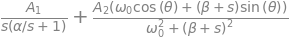

In [7]:
X = x(s)
X.expr

# 1C

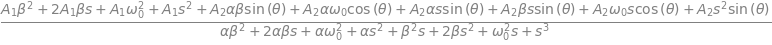

In [8]:
X.partfrac().simplify().expr

# 1D

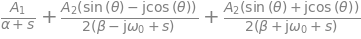

In [9]:
X.partfrac().simplify_terms().expr

# 1E

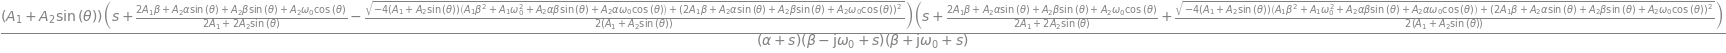

In [10]:
X.ZPK().expr

# Question 2: Laplace Analysis/Transform

## Problems
* [Laplace Analysis](#Laplace-Analysis)
    * [A](#2-1A)
    * [B](#2-1B)
    * [C](#2-1C)
    * [D](#2-1D)
    * [E](#2-1E)
* [Laplace Transform](#Laplace-Transform)
    * [A](#2-2A)
    * [B](#2-2B)
    * [C](#2-2C)

# Laplace Analysis

# 2-1A

In [11]:
from lcapy import Circuit
a = Circuit("""
P1 1 0; down=1.5, v=v(t)
R1 1 2; right=1.5
L 2 3; right=1.5
R2 3 0_2; down
W 0 0_2; right
W 3 4; right
W 4 5; right
W 0_2 0_3; right
C 4 0_3; down
W 0_3 0_4; right
P2 5 0_4; down, v^=v_c(t)""")

# 2-1B

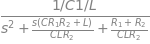

In [12]:
H = a.transfer(1, 0, 5, 0)
H.expr

# 2-1C

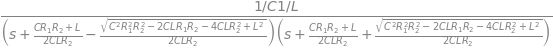

In [13]:
H.ZPK().expr

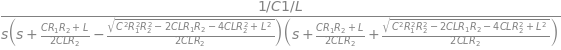

In [14]:
v = expr('u(t)')
V_i = v(s)
V_o = V_i * H
V_o.ZPK().expr

# 2-1D

In [15]:
cct = a.subs({'R1': 4, 'R2': 2, 'L' : 2.5, 'C' : 0.25})
H = cct.P1.transfer('P2')
v_i = voltage(u(t))
V_i = v_i(s)
V_o = V_i * H
v_o = V_o(t)
v_o.simplify().expr

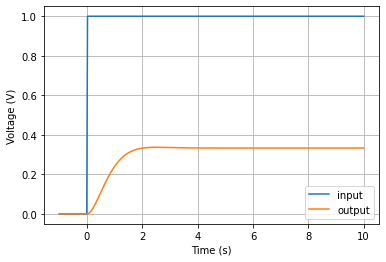

In [16]:
ax = v_i.plot((-1, 10), label='input')
ax = v_o.plot((-1, 10), axes=ax, label='output')
ax.legend()

# 2-1E

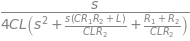

In [18]:
H_2 = a.P1.transfer('P2') * s/4 # dividing the last transfer function by its impedance to get the new transfer function
H_2.expr

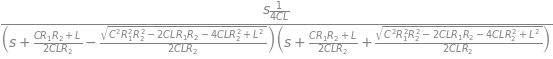

In [19]:
H_2.ZPK().expr

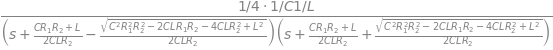

In [20]:
v = expr('u(t)')
V_i = v(s)
I_o = V_i * H_2
I_o.ZPK().expr

In [21]:
H_2 = cct.P1.transfer('P2') * s/4
v_i = voltage(u(t))
V_i = v_i(s)
I_o = V_i * H_2
i_o = I_o(t)
i_o.simplify().expr

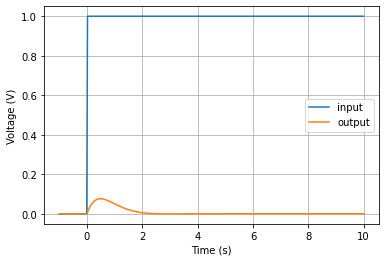

In [22]:
ax = v_i.plot((-1, 10), label='input')
ax = i_o.plot((-1, 10), axes=ax, label='output')
ax.legend()

In [42]:
E = 1/(2.5*s**2 + 9*s + 12)
E(t).expr

       -9⋅t                       
       ─────                      
         5      ⎛√39⋅t⎞           
2⋅√39⋅ℯ     ⋅sin⎜─────⎟           
                ⎝  5  ⎠           
───────────────────────  for t ≥ 0
           39                     

# Laplace Transform

# 2-2A

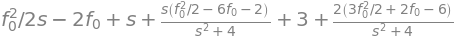

In [28]:
f0 = symbol('f0')
x = (3 - 2*f0)*delta(t) + (f0**2/2 + (f0**2/2 - 6*f0 - 2)*cos(2*t) + (3*f0**2/2 + 2*f0 - 6)*sin(2*t))*u(t) + impedance(s)(t) # for derivative of delta
x.LT().expr

# 2-2B

In [29]:
x1 = x.subs({'f0' : 2})
x1.expr 

# 2-2C

<AxesSubplot:title={'center':'Pole zero plot'}, xlabel='$\\sigma$', ylabel='$\\omega$'>

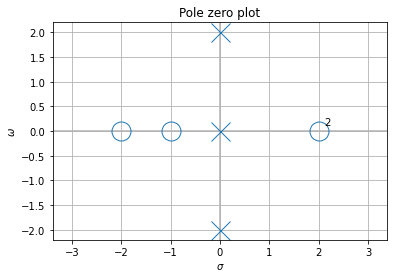

In [30]:
X1 = x1.LT()
X1.plot(xlabel=r'$\sigma$', ylabel=r'$\omega$', title='Pole zero plot')

# Question 3: Networks

## Problems
* [A](#3A)
* [B](#3B)
* [C](#3C)

# 3A

In [156]:
Z = impedance(4*((15 * s**2 + 112 * s + 80) / (s*(15*s**2 + 138*s + 136))))
Z.network()

(((C(121 
────
1295) + R(67081
─────
 6292)) | C(169 
────
2072)) + R(30
──
13)) | C(1/4)

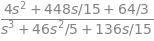

In [158]:
Z.network().Z(s).canonical().expr

# 3B

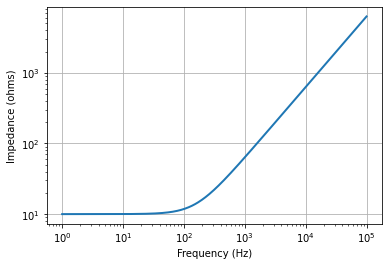

In [159]:
from lcapy import *
from numpy import logspace
from matplotlib.pyplot import figure, savefig

N = R(10) + L(1e-2)

vf = logspace(0, 5, 400)
Z = N.Z(f).evaluate(vf)

fig = figure()
ax = fig.add_subplot(111)
ax.loglog(vf, abs(Z), linewidth=2)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

# 3C

<AxesSubplot:title={'center':'Open Circuit'}, xlabel='Time (s)', ylabel='Voltage (V)'>

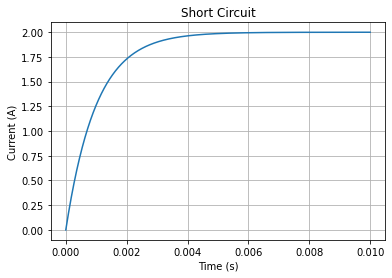

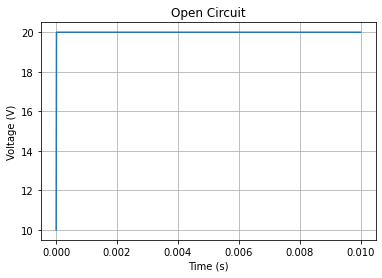

In [169]:
from lcapy import *
from numpy import linspace
from matplotlib.pyplot import savefig

N = Vstep(20) + R(10) + L(1e-2)

vt = linspace(0, 0.01, 1000)
N.Isc(t).plot(vt, title = "Short Circuit")

N.Voc(t).plot(vt, title = "Open Circuit")

# Question 4: Discrete time signals

## Problems
* [Discrete analysis](#Discrete-analysis)
    * [A](#4-1A)
    * [B](#4-1B)
* [Sequences](#Sequences)
    * [A](#4-2A)
    * [B](#4-2B)
    * [C](#4-2C)
    * [D](#4-2D)
* [Discrete Transforms](#Discrete-Transforms)
    * [A](#4-3A)
    * [B](#4-3B)

# Discrete analysis

# 4-1A

<AxesSubplot:xlabel='Discrete time'>

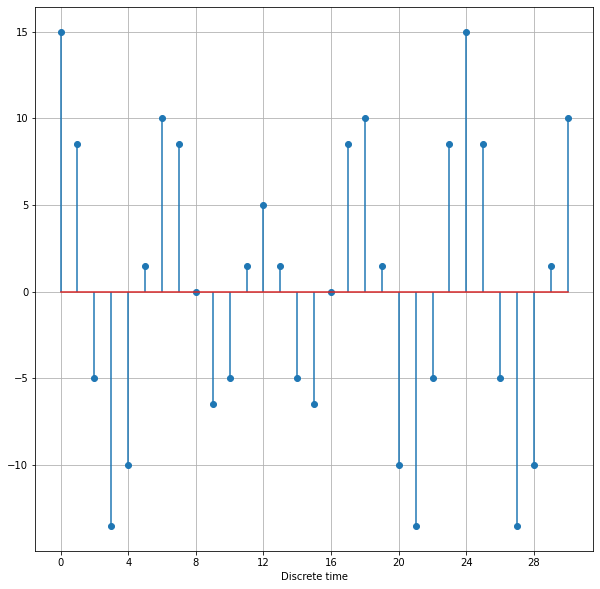

In [170]:
from lcapy import j, n, exp, pi, u
from matplotlib.pyplot import savefig

x = 5 * exp(-(j * pi* n)/4)*u(n) + 10 * exp(-(j * pi* n)/3)*u(n)
x.plot((0, 30), figsize=(10, 10))

# 4-1B

<PolarAxesSubplot:>

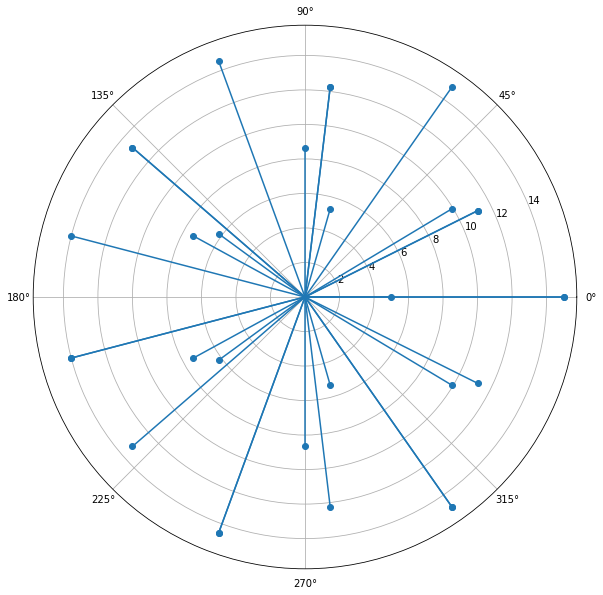

In [171]:
x.plot((0, 30), figsize=(10, 10), polar = True)

# Sequences

# 4-2A
It's been explained in report.

# 4-2B

In [209]:
import numpy as np
x1 = exp(-(j * pi* n)/2)*u(n)
X1 = x1.seq((0, 5))

x2 = n*u(n)
X2 = x2.seq((0, 5))

X3 = X1 + X1
X4 = seq([np.dot(X3.as_array()[1+m:7+m], X2.as_array()[::-1]) for m in range(6)])
# Pay attention! We have to multiply the shifted X3 to the reversed sequence of X2. 
# For more information check: https://www.cambro.umu.se/access/content/group/58023HT19-1/Convolution%2C%20examples/Convolution.pdf

# 4-2C

In [210]:
X4

{_-2 - 3⋅ⅉ, -1 + 2⋅ⅉ, 6 + ⅉ, 7 - 6⋅ⅉ, 2 - 7⋅ⅉ, 3 - 2⋅ⅉ}

# 4-2D
It's calculated in report.

# Discrete Transforms

# 4-3A

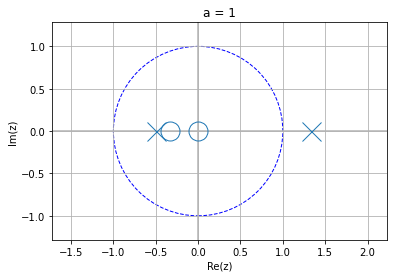

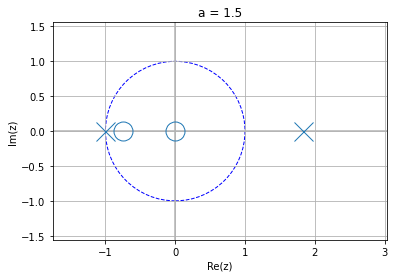

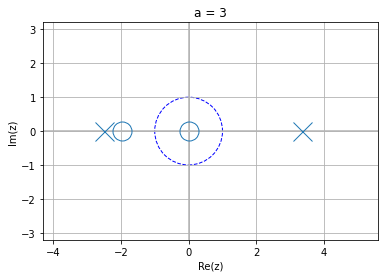

In [211]:
a = symbol('a')
x = (0.5 - a) ** n * u(n) + 10 * (a + 1/3) ** n * u(n)
for i in [1, 1.5, 3]:
    y = x.subs({'a' : i})
    Y = y.ZT()
    
    Y.plot(title = "a = {}".format(i))

# 4-3B

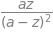

In [213]:
a = symbol('a')
x = n * a ** n * u(n)

X = x.ZT()
X.expr

In [100]:
X(n).simplify().expr

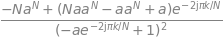

In [101]:
x.DFT().expr

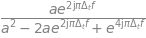

In [104]:
x.DTFT().expr

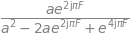

In [105]:
x.DTFT(F).expr

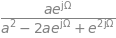

In [106]:
x.DTFT(Omega).expr

(<AxesSubplot:xlabel='Normalized angular frequency', ylabel='Magnitude (dB)'>,
 <AxesSubplot:xlabel='Normalized angular frequency', ylabel='Phase (radians)'>)

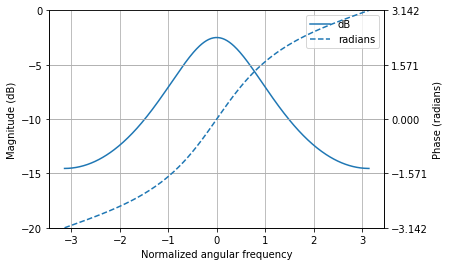

In [108]:
x1 = x.subs({'a' : 3})
x1.DTFT(Omega).plot()

# Question 5: Difference Equation

## Problems
* [A](#5A)
* [B](#5B)
* [C](#5C)
* [D](#5D)
* [E](#5E)
* [F](#5F)

# 5A

In [214]:
a = symbol('a')
b = symbol('b')
c = symbol('c')
d = symbol('d')
lpf = DLTIFilter((a, b, ), (1, c, d))
LPF = lpf.difference_equation()
LPF.expr

# 5B

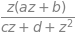

In [215]:
LPF.transfer_function().expr

# 5C

In [216]:
LPF.transfer_function().IZT().simplify().expr

    ⎛                    n                                                     n                
    ⎜⎛        __________⎞  ⎛           __________      ⎞   ⎛        __________⎞  ⎛            __
 -n ⎜⎜       ╱  2       ⎟  ⎜          ╱  2             ⎟   ⎜       ╱  2       ⎟  ⎜           ╱  
2  ⋅⎝⎝-c - ╲╱  c  - 4⋅d ⎠ ⋅⎝a⋅c + a⋅╲╱  c  - 4⋅d  - 2⋅b⎠ + ⎝-c + ╲╱  c  - 4⋅d ⎠ ⋅⎝-a⋅c + a⋅╲╱  c
────────────────────────────────────────────────────────────────────────────────────────────────
                                                     __________                                 
                                                    ╱  2                                        
                                                2⋅╲╱  c  - 4⋅d                                  

               ⎞           
________      ⎞⎟           
2             ⎟⎟           
  - 4⋅d  + 2⋅b⎠⎠           
────────────────  for n ≥ 0
                           
                           
                           

# 5D

In [217]:
de = difference_equation('y(n)', 'x(n) + x(n - 1) + 3*y(n-1) - 2 * y(n-2)')
de.expr

# 5E

In [220]:
tf = de.transfer_function()
tf.difference_equation('x', 'y', 'iir').expr

In [227]:
(de.transfer_function() * (2**n * u(n)).ZT()).IZT().expr

 n                         
2 ⋅(3⋅n - 1) + 2  for n ≥ 0

# 5F

In [223]:
x = 2 ** n * u(n)
fi = de.dlti_filter()
seq(fi.response(x).as_array()[1:4])

{_6, 22, 66}